In [1]:
import pandas as pd
import numpy as np

# Load the datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Display the first few rows
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
movies = movies.merge(credits, on='title')

In [4]:
#keeping relevant columns
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew', 'popularity', 'vote_average', 'vote_count', 'revenue', 'release_date']]

In [5]:
#handle missing values
movies.dropna(inplace=True)

In [6]:
#Convert genres, keywords, cast, and crew from JSON strings to lists
import ast

def extract_names(text):
    return [item['name'] for item in ast.literal_eval(text)]

movies['genres'] = movies['genres'].apply(extract_names)
movies['keywords'] = movies['keywords'].apply(extract_names)
movies['cast'] = movies['cast'].apply(extract_names)
movies['crew'] = movies['crew'].apply(extract_names)

In [7]:
#Combine overview, genres, keywords, cast, and crew into a single tags column
movies['tags'] = movies['overview'] + ' ' + movies['genres'].apply(' '.join) + ' ' + \
                 movies['keywords'].apply(' '.join) + ' ' + movies['cast'].apply(' '.join) + ' ' + \
                 movies['crew'].apply(' '.join)

In [8]:
#Use TF-IDF to convert text data into numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags'])

In [9]:
#Compute cosine similarity between movies
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [10]:
#Create a function to recommend movies based on similarity scores
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie
    idx = movies[movies['title'] == title].index[0]
    
    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top 10 similar movies
    sim_scores = sim_scores[1:11]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return top 10 similar movies
    return movies['title'].iloc[movie_indices]

In [33]:
#testing the function with a movie 
get_recommendations('American Psycho')

4515                                         Love Letters
3753                                    The Boy Next Door
1754                                   Notes on a Scandal
3344                                 (500) Days of Summer
2036                                             Derailed
1729    Alexander and the Terrible, Horrible, No Good,...
3913                                        The Apartment
3130                                               Eulogy
2216                                       Be Kind Rewind
1343                                    We're the Millers
Name: title, dtype: object

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

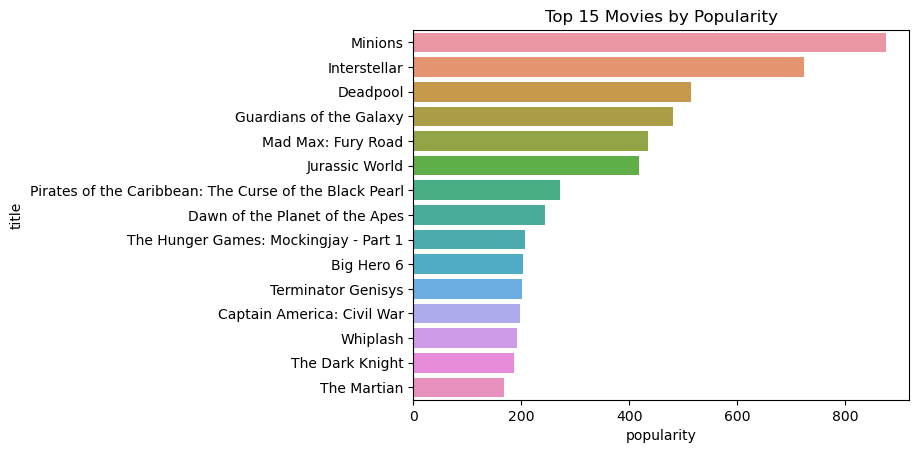

In [27]:
# Top 15 movies by popularity
top_movies = movies.nlargest(15, 'popularity')[['title', 'popularity']]
sns.barplot(x='popularity', y='title', data=top_movies)
plt.title('Top 15 Movies by Popularity')
plt.show()

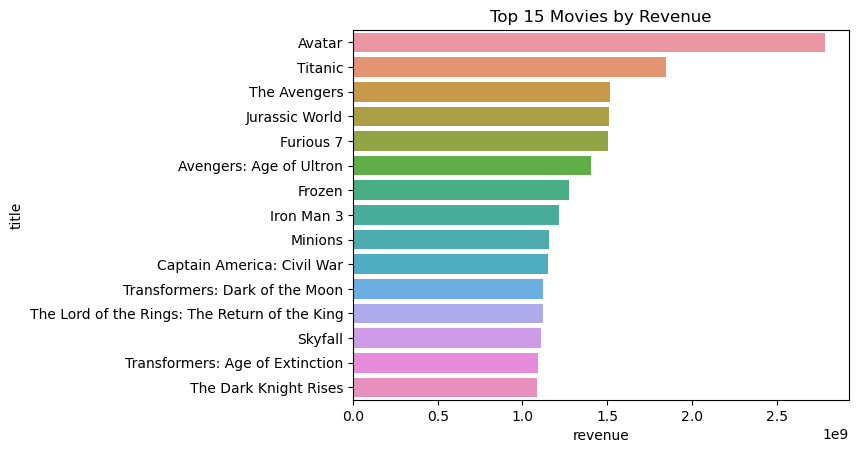

In [32]:
# Top 15 movies by revenue
top_movies = movies.nlargest(15, 'revenue')[['title', 'revenue']]
sns.barplot(x='revenue', y='title', data=top_movies)
plt.title('Top 15 Movies by Revenue')
plt.show()

/Users/joanarias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


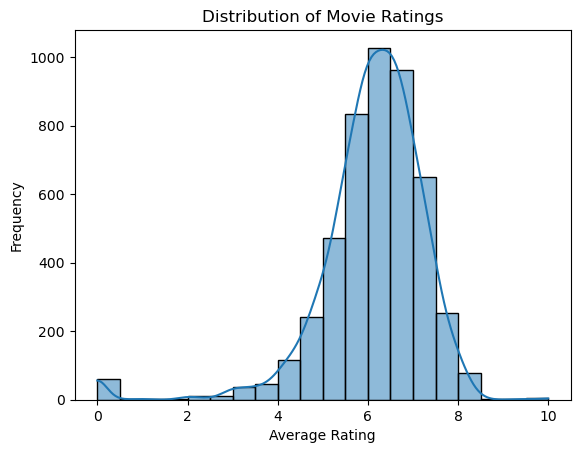

In [24]:
# Distribution of average ratings
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()